## Daniel Barella
## 9/15/25

# 📓 Day 15 – Mini Project 2 (EDA Challenge)
## Dataset

### Wine Quality Dataset (Red Wine)

- Source: UCI Machine Learning Repository

- Columns include:

    - fixed acidity, volatile acidity, citric acid, residual sugar

    - chlorides, free sulfur dioxide, total sulfur dioxide

    - density, pH, sulphates, alcohol, quality

- File: winequality-red.csv

You can download it here:
https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

## Day 15 Objectives

- Load and inspect the new dataset
- Clean data if necessary (missing values, duplicates)
- Perform basic EDA (describe, info, value counts)
- Visualize key relationships (histograms, boxplots, KDE, scatterplots)
- Summarize insights in Markdown cells


In [9]:
# import pandas as pd

# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# df = pd.read_csv(url)

# Save locally
# df.to_csv("winequality-red.csv", index=False)


### 1. Imports & Load Dataset

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Column names for the wine dataset
# cols = [
#    "fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides",
#    "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality"
# ]

# Step 1: Read the messy CSV (semicolon-delimited inside one column)
# wine_raw = pd.read_csv("winequality-red.csv", header=None, names=["all"], engine='python')

# Step 2: Split the single column into 12 columns
# wine_split = wine_raw['all'].str.split(';', expand=True)

# Step 3: Assign proper column names
# wine_split.columns = cols

# Step 4: Convert all columns to numeric
# wine_clean = wine_split.apply(pd.to_numeric, errors='coerce')

# Step 5: Save a cleaned CSV
# wine_clean.to_csv("wine_clean.csv", index=False)

# Step 6: Check the cleaned DataFrame
# print(wine_clean.head())
# print(wine_clean.info())

wine = pd.read_csv("wine_clean.csv")
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0


### 2. Cleaning

In [12]:
# Check for missing data
wine.isnull().sum()

# Check for duplicates
wine.duplicated().sum()


240

### 3. Descriptive Statistics

In [13]:
wine.describe()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### 4. Visualizations

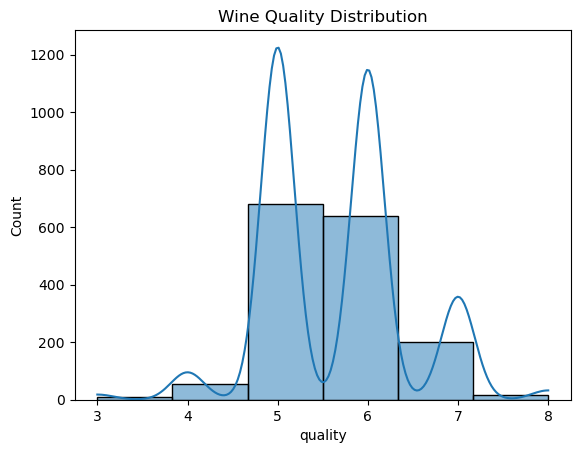

In [14]:
# Histogram of quality
sns.histplot(wine['quality'], bins=6, kde=True)
plt.title("Wine Quality Distribution")
plt.show()








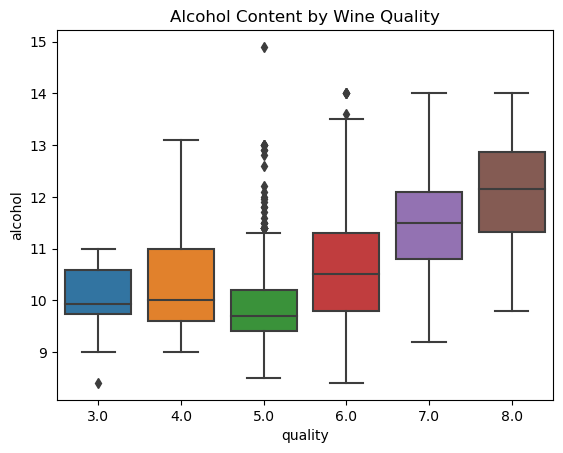

In [15]:
# Boxplot: Alcohol vs Quality
sns.boxplot(x='quality', y='alcohol', data=wine)
plt.title("Alcohol Content by Wine Quality")
plt.show()

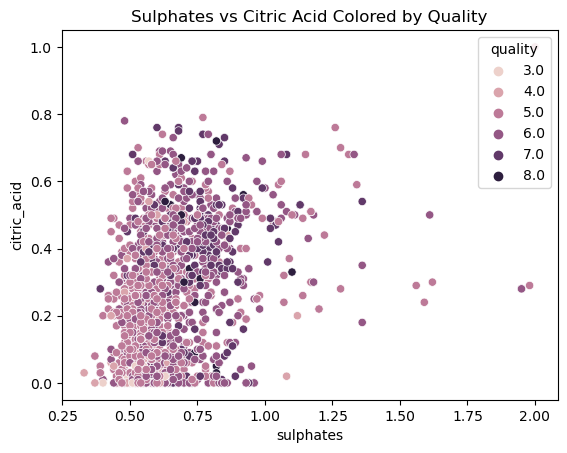

In [16]:
# Scatterplot: Sulphates vs Citric Acid
sns.scatterplot(x='sulphates', y='citric_acid', hue='quality', data=wine)
plt.title("Sulphates vs Citric Acid Colored by Quality")
plt.show()

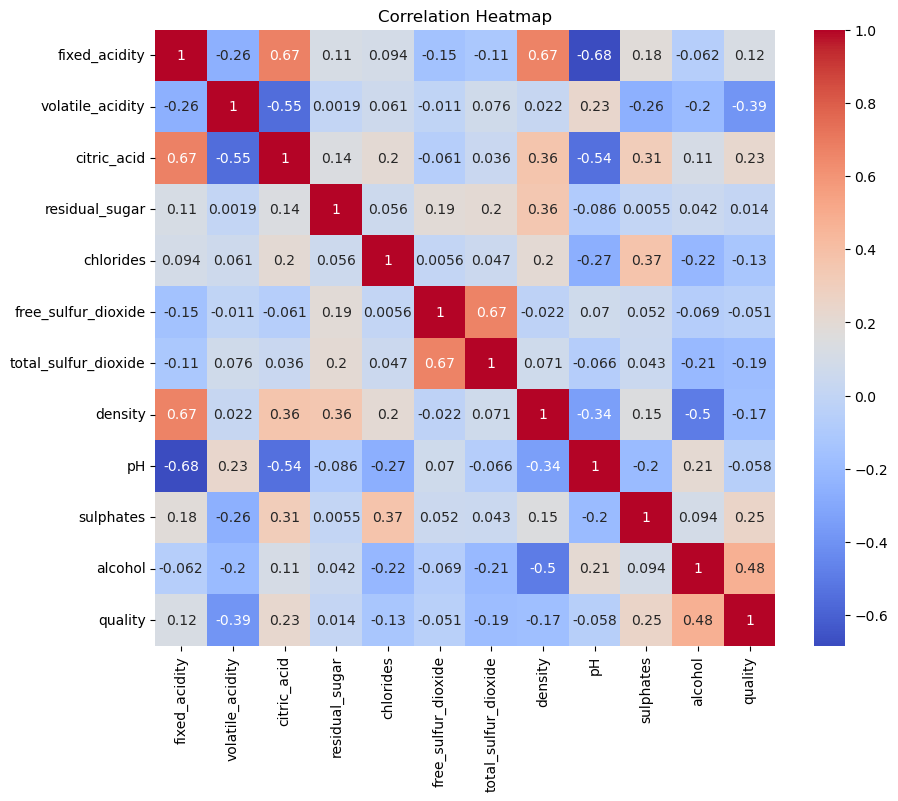

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## 5. Reflection & Insights

### Reflection
- Alcohol tends to increase with higher quality wines
- Volatile acidity negatively correlates with quality
- KDE and histograms help identify distribution patterns
- Correlation heatmaps reveal strong relationships between some chemical features
